<a href="https://colab.research.google.com/github/rodfiguerosky/UCV_DS/blob/main/Proyecto_final_DS_python_UCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Instrucciones del Proyecto Final
Preparar un dataset:

1. Seleccionar un conjunto de terminos de busquda. ej: SpaceX, Precio de hortalizas, etc.

2. Al menos 2 veces al dia por 7 dias realizar una busqueda de Google.

3. Extraer las 5 primeras url y sus posiciones (Ej. spaceX)

   1. spacex.com

   2.    twitter.com/SpaceX

   3.  wikipedia.org/SpaceX

   etc

   4. Guardar los URL resultantes junto con su tiltulo descriptivo

   5. Anotar los URL con una categoria (ej. Noticias, Foros, Informativo, etc)

4. Preparar y curar los datos resultantes


Clasificar

1. Prepara un modelo de clasificacion (en base al titulo y de ser posible al texto descriptivo) de  la fase 1

2. Seleccionar una muestra de URLS  clasificarlos segun su texto para realizar la prueba del modelo

3. Las categorias pueden ser: Noticias, Informativo, Foros, etc...

Probar:

1. Incorporar al proceso de captura de resultados de busqueda que clasifique los resultados de busqueda automaticamente

Inferir

1. Dado un URL indicar cual ha sido su movimiento dentro de los resultados de busqueda y sugerir una proxima posicion.

Ej:

spacex.com se mueve asi tras cada captura:

Pos 1, Pos 2, Pos 5, ..... PosN

Mediante esos movimiento inferir PosN




### Procedimiento de busqueda:
* Las consultas se realizaron en el meta-buscador: [searx](https://searx.thegpm.org/)   
* Se realiza la consulta de la ultima semana de noticias respecto al dia de hoy '19-09-2032' con la palabra o termino "***Venezuela***": http://searx.thegpm.org/?q=venezuela&categories=news&time_range=week&language=en    
* Finalmente se hace "download" de las busquedas resultantes en formato *.json

In [ ]:
# para no 'upload' data manualmente
# importando archivos *.json
# los archivos antes mencionados se encuentran en la carpeta repositorio del drive DS_python_UCV
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# https://drive.google.com/file/d/xxxxxxxxxx/view?usp=drive_link
download = drive.CreateFile({'id': 'xxxxxxxxxx'})
download.GetContentFile('searx.thegpm.org_0.json')

# https://drive.google.com/file/d/xxxxxxxxxx/view?usp=drive_link
download = drive.CreateFile({'id': 'xxxxxxxxxx'})
download.GetContentFile('searx.thegpm.org_1.json')

# https://drive.google.com/file/d/xxxxxxxxxx/view?usp=drive_link
download = drive.CreateFile({'id': 'xxxxxxxxxx'})
download.GetContentFile('searx.thegpm.org_2.json')

# https://drive.google.com/file/d/xxxxxxxxxx/view?usp=drive_link
download = drive.CreateFile({'id': 'xxxxxxxxxx'})
download.GetContentFile('searx.thegpm.org_3.json')

# https://drive.google.com/file/d/xxxxxxxxxx/view?usp=drive_link
download = drive.CreateFile({'id': 'xxxxxxxxxx'})
download.GetContentFile('searx.thegpm.org_4.json')

# https://drive.google.com/file/d/xxxxxxxxxx/view?usp=drive_link
download = drive.CreateFile({'id': 'xxxxxxxxxx'})
download.GetContentFile('searx.thegpm.org_5.json')

# https://drive.google.com/file/d/xxxxxxxxxx/view?usp=drive_link
download = drive.CreateFile({'id': 'xxxxxxxxxx'})
download.GetContentFile('searx.thegpm.org_6.json')

In [ ]:
# Transformacion y curetaje de la informacion en dataframes del modulo 'pandas'
import numpy as np
import pandas as pd
import json

In [ ]:
for i in range(7):
    with open(f'searx.thegpm.org_{i}.json', 'r') as f:
        data = json.load(f)
        data = data['results']
    if i == 0:
        df = pd.json_normalize(data)
    else:
        df_i = pd.json_normalize(data)
        df = pd.concat([df, df_i])


In [ ]:
df = df[['engine','positions', 'pubdate', 'url', 'title', 'content']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 0 to 9
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   engine     70 non-null     object
 1   positions  70 non-null     object
 2   pubdate    70 non-null     object
 3   url        70 non-null     object
 4   title      70 non-null     object
 5   content    70 non-null     object
dtypes: object(6)
memory usage: 3.8+ KB


### Construcción de la variable respuesta $Y$ (Clasificación);
Para construir la variable target ("label") $Y$ o variable de respuesta designaremos un grupo de sustantivos que pertenecen a un determinado topico en particular. Usaremos el criterio de que basta que tán solo aparezca uno de los sustantivos en ***'title'*** o ***'content'*** y el ***'url'*** será classificado en algun topico $Y_i$.   

Los topicos en particular son: $Y=\{ sansiones,\; narcotrafico,\; relaciones\: china,\;petroleo,\;deportes,\;emigracion,\;esequibo,\;oro, ....\}$   

**Por ej;** sí en las columnas ***'title'*** o ***'content'*** contienen la palabra *'coccaine'* el ***'url'*** perteneciente a dicha observación será clasificado como que pertenece al topico ***'narcotrafico'***.    

In [ ]:
# topicos key
key_topicos = {
    "sanciones":"sanction.?",
    "narcotrafico": "coccaine|drug.",
    "rel_china": "Xi|China|Beijing",
    "petroleo": "oil|OPEC|crude",
    "deportes": "soccer|baseball|Yulimar Rojas|Deyna Castellanos|FIFA",
    "emigracion": "migrant.?|exodus|miami|Dari.n",
    "esequibo":"Guyana.?",
    "oro": "gold.?|mines"
}

In [ ]:
def contiene_y_topico(topico):
    title_clasif_bool = df['title'].str.contains(pat=topico, case= False, regex = True)
    content_clasif_bool = df['content'].str.contains(pat=topico, case= False, regex = True)
    bool_clasif = title_clasif_bool.add(content_clasif_bool)
    return  bool_clasif

In [ ]:
# idea: quizas for-loop
df = df.assign(topico_sanciones = contiene_y_topico(key_topicos['sanciones']),
               topico_narcotrafico = contiene_y_topico(key_topicos['narcotrafico']),
               topico_rel_china = contiene_y_topico(key_topicos['rel_china']),
               topico_petroleo = contiene_y_topico(key_topicos['petroleo']),
               topico_deportes = contiene_y_topico(key_topicos['deportes']),
               topico_emigracion = contiene_y_topico(key_topicos['emigracion']),
               topico_esequibo = contiene_y_topico(key_topicos['esequibo']),
               topico_oro = contiene_y_topico(key_topicos['oro']))

In [ ]:
df['Y_label'] = np.where(df['topico_sanciones'] , 'sanciones',
                        np.where(df['topico_narcotrafico'], 'narcotrafico',
                            np.where(df['topico_rel_china'], 'rel_china',
                                np.where(df['topico_petroleo'], 'petroleo',
                                    np.where(df['topico_deportes'], 'deportes',
                                        np.where(df['topico_emigracion'], 'emigracion',
                                            np.where(df['topico_esequibo'], 'esequibo',
                                                np.where(df['topico_oro'], 'oro', 'otros')))))))
                        )

# errata: hay obserciones en que la clasificacion segun el topico no es es unica

In [ ]:
df.head()

,engine,positions,pubdate,url,title,content,topico_sanciones,topico_narcotrafico,topico_rel_china,topico_petroleo,topico_deportes,topico_emigracion,topico_esequibo,topico_oro,Y_label
0,bing news,[1],2023-09-19 14:40:00+0000,https://www.aol.com/news/bus-asylum-seekers-ve...,Bus of asylum seekers from Venezuela and El Sa...,The 14th bus of Los Angeles-bound migrants shi...,False,False,False,False,False,True,False,False,emigracion
1,bing news,[3],2023-09-19 15:08:00+0000,https://venezuelanalysis.com/news/15850,Venezuela’s Maduro Concludes Foreign Tour in C...,Maduro returned to Venezuela following the G77...,False,False,True,False,False,False,False,False,rel_china
2,bing news,[4],2023-09-19 14:09:00+0000,https://efe.com/en/latest-news/2023-09-19/guya...,Guyana responds to Venezuela that it has right...,Guyanese President Irfaan Ali said that Guyana...,False,False,False,True,False,False,True,False,petroleo
3,bing news,[5],2023-09-18 11:00:54+0000,https://www.msn.com/en-us/news/world/venezuela...,Venezuela may put an astronaut on a Chinese mo...,Any Venezuelan excursion to the moon may be so...,False,False,True,False,False,False,False,False,rel_china
4,bing news,[6],2023-09-19 12:59:00+0000,https://www.jamaicaobserver.com/latest-news/ve...,Venezuela rejects 'illegal' Guyana oil auction...,Venezuela on Tuesday lashed out at neighbourin...,False,False,False,True,False,False,True,False,petroleo


### Realizando un conteo de $Y$ o variable 'target':
Nomenclatura de topicos de $Y$:
*  **rel_china** : 'relaciones internacionales Venezuela-China'
*  **sanciones** : 'asuntos relacionados con las sanciones internacionales'
*  **petroleo** : 'asuntos relacionados con la industria petrolera'
*  **deportes** : 'asuntos relacionados con los atletas venezolanos'
*  **emigracion** : 'asuntos relacionados emigración venezolana por consecuencia de la crisis economica'
* **esequibo**: 'asuntos relacionados con el diferendo limitrofe entre Venezuela-Guyana'
* **oro**: 'asuntos relacionados con la extracción de oro mineral en Venezuela'
* **otros**: 'asuntos sin relvancia u importancia, hechos meramente agnecdoticos'



<Axes: >

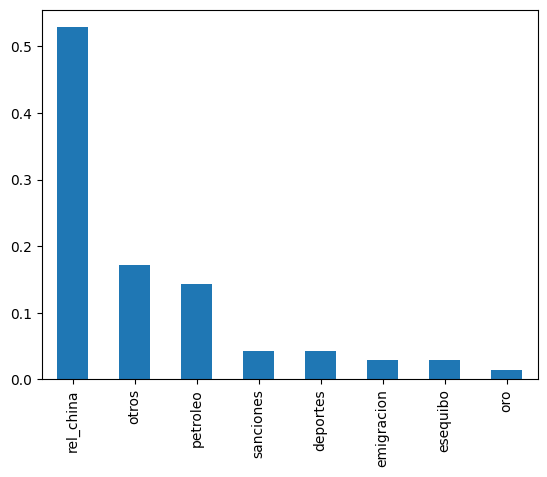

In [ ]:
# check target balance

df['Y_label'].value_counts(normalize = True).plot.bar()